# Project 3 | ENPM 661 | Planning for Autonomous Robots |



Dijkstra Algorithm for Rigid Robot with Obstacles | Govind Ajith Kumar & Rajeshwar NS

In [1]:
#Importing all the libraries
import numpy as np
import copy
import math
import heapq
import time
import matplotlib.pyplot as plt
import cv2
import pygame

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
#Getting the start time to measure the time taken for solving
start_time = time.time()

In [3]:
def Round2Point5(num):
    return (round(num * 2) / 2)

In [4]:
def EucledianDistance(a,b):  
    x1 = a[0]
    x2 = b[0]
    y1 = a[1]
    y2 = b[1]
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
    return dist  

In [5]:
step_count=1
def ActionMove(curr_node,degree,step_size=1.0):
    x = curr_node[0]
    y = curr_node[1]
    x_new = (step_size)*np.cos(np.deg2rad(degree)) + x# - (y-0)*np.sin(np.deg2rad(degree)) + length
    y_new = (step_size)*np.sin(np.deg2rad(degree)) + y# + (y-0)*np.cos(np.deg2rad(degree)) + length
    new_node = (round(x_new,2),round(y_new,2))
    if new_node[0]>=0.00 and new_node[0]<=300.00 and new_node[1]>=0.00 and new_node[1]<=200.00:
        return(new_node,True)
    else:
        return(curr_node,False)

In [6]:
#calculating all the points within the entire canvas
all_possible_points = []
for i in range(0,601): #300 width
    for j in range(0,401): #200 width
        all_possible_points.append((Round2Point5(i/2),Round2Point5(j/2))) #appending
#                               POINTS FOR REMOVING VALUES FROM THE GRAPH
radius = 1
clearence = 1
map_points = []
list_of_obstacle_points=[]
for pt in all_possible_points:
    x = pt[0]
    y = pt[1]
#circle shaped obstacle
    #for path traversal
    if((x-225)**2 + (y-150)**2 <= (25+radius+clearence)**2):
        list_of_obstacle_points.append((x,y))

#ellipse shaped obstacle
    #for path traversal
    if(((x-150)**2)/(40+radius+clearence)**2 +((y-100)**2)/(20+radius+clearence)**2 <= 1):
        list_of_obstacle_points.append((x,y))

#complex polygon shaped obstacle
    #for path traversal
    if y>=120+radius+clearence and y<=185+radius+clearence and x>=20+radius+clearence and x<=100+radius+clearence:
        if y-(13*x)<=-140+radius+clearence:
            if y-x>=100-(radius+clearence) or y+(6/5)*x>=210-(radius+clearence):
                if y-(6/5)*x>=30-(radius+clearence):
                    if y+(7/5)*x<=290+(radius+clearence):
                        list_of_obstacle_points.append((x,y))

#rectangle slanted shaped obstacle
    #for path traversal
        #for map
    if y-(8/5)*x>=-122-(radius+clearence) and y+(38/65)*x<=(1254/13)+(radius+clearence) and y-(9/5)*x<=13+(radius+clearence) and y+(37/65)*x>=(1093/13)-(radius+clearence):
        list_of_obstacle_points.append((x,y))

#rhombus shaped obstacle
    #for path traversal
    if y-(3/5)*x<=-95+(radius+clearence) and y+(3/5)*x<=175+(radius+clearence) and y-(3/5)*x>=-125-(radius+clearence) and y+(3/5)*x>=145-(radius+clearence):
        list_of_obstacle_points.append((x,y))

        
        
        
        
#                               POINTS FOR DRAWING THE GRAPH
all_possible_int_points = []
for i in range(0,301): #300 width
    for j in range(0,201): #200 width
        all_possible_int_points.append((i,j)) #appending

for pt in all_possible_int_points:
    x = pt[0]
    y = pt[1]
#circle shaped obstacle
    
    #for map
    if((x-225)**2 + (y-150)**2 <= (25)**2):
        map_points.append((x,y))

#ellipse shaped obstacle
    #for path traversal
    #for map
    if(((x-150)**2)/40**2 +((y-100)**2)/20**2 <= 1):
        map_points.append((x,y))

#complex polygon shaped obstacle
    #for map
    if y>=120 and y<=185 and x>=20 and x<=100:
        if y-(13*x)<=-140:
            if y-x>=100 or y+(6/5)*x>=210:
                if y-(6/5)*x>=30:
                    if y+(7/5)*x<=290:
                        map_points.append((x,y))

#rectangle slanted shaped obstacle
    #for path traversal
        #for map
    if y-(8/5)*x>=-122 and y+(38/65)*x<=(1254/13) and y-(9/5)*x<=13 and y+(37/65)*x>=(1093/13):
        map_points.append((x,y))

#rhombus shaped obstacle
    #for path traversal
    #for map
    if y-(3/5)*x<=-95 and y+(3/5)*x<=175 and y-(3/5)*x>=-125 and y+(3/5)*x>=145:
        map_points.append((x,y))
list_of_obstacle_points.sort()

In [7]:
(196,24) in list_of_obstacle_points

False

In [8]:
#showing what all child nodes each parent nodes are connected to
list_of_points_for_graph = []
def generateGraph(point,orientation,size_x,size_y): #remember that this size_x and size_y are the sizes of the matrix, so not the end coordinates
    global step_count
    global list_of_points_for_graph
    i = point[0] #x coordinate
    j = point[1] #y coordinate
    if i <=size_x and j<=size_y and i>=0 and j>=0:
        
        cost_values = {}
        
        pos0 = ActionMove(point,orientation+0)[0]#0
        if pos0[0]>=0 and pos0[1]>=0 and pos0[0]<=size_x and pos0[1]<=size_y:
#             if (Round2Point5(pos0[0]),Round2Point5(pos0[1])) not in list_of_obstacle_points: 
            cost_values[pos0] = step_count
            
        pos30 = ActionMove(point,orientation+30)[0]#30
        if pos30[0]>=0 and pos30[1]>=0 and pos30[0]<=size_x and pos30[1]<=size_y:
#             if (Round2Point5(pos30[0]),Round2Point5(pos30[1])) not in list_of_obstacle_points: 
            cost_values[pos30] = step_count
            
        pos60 = ActionMove(point,orientation+60)[0]#60
        if pos60[0]>=0 and pos60[1]>=0 and pos60[0]<=size_x and pos60[1]<=size_y:
#             if (Round2Point5(pos60[0]),Round2Point5(pos60[1])) not in list_of_obstacle_points: 
            cost_values[pos60] = step_count
            
        pos_minus60 = ActionMove(point,orientation-60)[0]#-60
        if pos_minus60[0]>=0 and pos_minus60[1]>=0 and pos_minus60[0]<=size_x and pos_minus60[1]<=size_y:
#             if (Round2Point5(pos_minus60[0]),Round2Point5(pos_minus60[1])) not in list_of_obstacle_points: 
            cost_values[pos_minus60] = step_count
            
        pos_minus30 = ActionMove(point,orientation-30)[0]#-30
        if pos_minus30[0]>=0 and pos_minus30[1]>=0 and pos_minus30[0]<=size_x and pos_minus30[1]<=size_y:
#             if (Round2Point5(pos_minus30[0]),Round2Point5(pos_minus30[1])) not in list_of_obstacle_points: 
            cost_values[pos_minus30] = step_count
            
        cost_values_copy = cost_values.copy()
        for k,v in cost_values_copy.items():
            if k==point:
                del cost_values[k]
        return(cost_values)
    else:
        pass

In [9]:
#for finding the manhattan distance using a star algorithm
def find_manhattan_distance(curr_position,goal):
    manhattan_distance = (abs(curr_position[1] - goal[1]) + abs(curr_position[0] - goal[0]))
    return (manhattan_distance)

In [22]:
#empty dictionary with all the distances
all_distance = {}
#empty dictionary with all the distances
open_list = {}
#empty dictionary for backtracking from child to parent upto the start
backtracking = {}
#list of all the visited nodes
#creating a 200rows, by 300 column by 12 layers
# rows = 400
# columns = 600
# visited=np.zeros((rows,columns))
visited = []
#if visualization is a problem, stack the layers and work from there
#variable to exit out of the while loop in the dijkstraAlgorithm function
check=0
rounded_check = []
def a_star_Algorithm(start,goal,orientation):
    global list_of_obstacle_points
    global step_count
    global backtracking
    #adding the global variables
    global check
    global visited
    global all_distance
    #when the function starts
    if goal in list_of_obstacle_points or start in list_of_obstacle_points:
        print('!!!!!!!!!!GOAL/START IS INSIDE OBSTACLE SPACE!!!!!!!!!!')
        all_distance=0
        backtracking=0
        rounded_neighbour=0
    else:
        all_distance[start]=0
        #appending the start node to the list of visited nodes
    #     visited.append(start)
        #setting all nodes as infinity distance away
        #starting the priority queue with the start node
        priority_queue = [(0,start)]
        #checking the length of the priority queue
        #and, inserting the while loop exit condition
        while len(priority_queue)>0 and check!=[]:
            #popping the current distance and the currenyt vertex 
            #from the priority queue
            #priority_queue.sort()
            curr_dist,curr_vert = heapq.heappop(priority_queue)
    #         print('                     smallest distance as per heapop is ',curr_dist)
#             print('                                     parent ',curr_vert)
#             print(priority_queue)
            if curr_vert not in list_of_obstacle_points:
        #         print('curr_dist,curr_vert >> ',curr_dist,curr_vert)
                graph = generateGraph(curr_vert,orientation,301,201)
                for vertex,edge in graph.items():
                    all_distance[vertex]=math.inf
                graph_list = []
                for key,cost_value in graph.items():
                    graph_list.append((key,cost_value))
        #         print('graph_list is',graph_list)
                #checking the value of the current distance and 
                if curr_dist>all_distance[curr_vert]:
                    continue
                for neighbour,cost in graph_list:
                    distance = curr_dist + step_count + find_manhattan_distance(neighbour,goal)
        #             print('neighbour is ',neighbour,'distance',distance)
                    #checking when the variable <distance> that was calculated is lesse
                    #than the neighbouring cost
                    if distance < all_distance[neighbour]:
                        rounded_neighbour = (Round2Point5(neighbour[0]),Round2Point5(neighbour[1]))
                        if rounded_neighbour not in rounded_check:
                            rounded_check.append(rounded_neighbour)
                            backtracking[rounded_neighbour]={}
                            #adding to the backtracking dictionary
                            backtracking[rounded_neighbour][distance]=curr_vert
                            all_distance[rounded_neighbour]=distance
                            #pushing from the priority queue
                            #rounded neighbour
        #                     print('rounded neighbour is : ')
        #                     print(rounded_neighbour)
        #                     print(priority_queue)
            #                 for i in priority_queue:
            #                     if rounded_neighbour not in i:
                            heapq.heappush(priority_queue, (distance, rounded_neighbour))
                            #checking of the neighbour is not added to the visited
                            #checks what node to go to next
                            if rounded_neighbour not in visited:
        #                         print('saving for this parent ..........')
            #                     print('ROUNDED OFF VALUES')
            #                     print(int(2*Round2Point5(curr_vert[0])),int(2*Round2Point5(curr_vert[1])))
                                #appending to the visited list
                                visited.append(rounded_neighbour)
                                #checking if the neighbour is the goal
                                if ((rounded_neighbour[0]-goal[0])**2 + (rounded_neighbour[1]-goal[1])**2 <= (1.5)**2):
                                    print('^^^^^^^^^^^^^^^')
                                    print('GOAL REACHED')
                                    print('^^^^^^^^^^^^^^^')
                                    print(rounded_neighbour)
                                    #changing check variable for the exit condition
                                    check=[]
                                    #breaking out of the loop
                                    break
                                else:
                                    pass
    #         print('------------------------------')
    #returning all_distance, visited list and backtracked dictionary
    return(all_distance,backtracking,rounded_neighbour)     

In [23]:
start = (105,100)
goal = (203,100)
orientation = 0
all_distances,backtracking,new_goal_rounded= a_star_Algorithm(start,goal,orientation)

^^^^^^^^^^^^^^^
GOAL REACHED
^^^^^^^^^^^^^^^
(202.0, 99.0)


In [24]:
# function to backtrack
def BackTrack(backtrack_dict,goal,start):#goal is the starting point now and start is the goal point now
    #initializing the backtracked list
    back_track_list = []
    #appending the start variable to the back_track_list list
    back_track_list.append(start)
    #while the goal is not found
    while goal!=[]:
        #for key and values in the backtracking dictionary 
        for k,v in backtracking.items():
            
            #for the key and values in the values, v
            for k2,v2 in v.items():
                #checking if the first key is the start
                if k==start:
                    #checking if not in the backtrackedlist
                    if v2 not in back_track_list:
                        back_track_list.append(start)
                    #updating the start variable
                    start=v2
                    #checking if it is the goal
                    if v2==goal:
                        goal=[]
                        break
        
    #returns the backtracked list
    return(back_track_list)

In [25]:
backtracked_final = BackTrack(backtracking,start,new_goal_rounded)
print(backtracked_final)

[(202.0, 99.0), (202.0, 99.0), (201.0, 98.5), (200.0, 98.0), (199.0, 97.5), (198.0, 97.0), (197.0, 96.5), (196.0, 96.0), (195.0, 95.5), (194.0, 95.0), (193.0, 94.5), (192.0, 94.0), (191.0, 93.5), (190.0, 93.0), (189.5, 92.0), (189.0, 91.0), (188.0, 90.5), (187.5, 89.5), (186.5, 89.0), (186.0, 88.0), (185.0, 87.5), (184.0, 87.0), (183.5, 86.0), (182.5, 85.5), (181.5, 85.0), (180.5, 84.5), (179.5, 84.0), (178.5, 83.5), (177.5, 83.0), (176.5, 82.5), (175.5, 82.5), (174.5, 82.0), (173.5, 81.5), (172.5, 81.0), (171.5, 81.0), (170.5, 80.5), (169.5, 80.5), (168.5, 80.0), (167.5, 80.0), (166.5, 79.5), (165.5, 79.5), (164.5, 79.0), (163.5, 79.0), (162.5, 78.5), (161.5, 78.5), (160.5, 78.5), (159.5, 78.5), (158.5, 78.0), (157.5, 78.0), (156.5, 78.0), (155.5, 78.0), (154.5, 78.0), (153.5, 78.0), (152.5, 78.0), (151.5, 78.0), (150.5, 78.0), (149.5, 78.0), (148.5, 78.0), (147.5, 78.0), (146.5, 78.0), (145.5, 78.0), (144.5, 78.0), (143.5, 78.0), (142.5, 78.0), (141.5, 78.0), (140.5, 78.5), (139.5, 7

Total Time Taken :  758.0549159049988 seconds


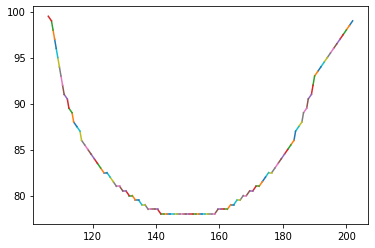

In [26]:
for i in range(1,len(backtracked_final)-1):
    x = backtracked_final[i][0]
    y = backtracked_final[i][1]
    x2 = backtracked_final[i+1][0]
    y2 = backtracked_final[i+1][1]
    plt.plot([x,x2],[y,y2])

print("Total Time Taken : ",time.time() - start_time, "seconds")

In [27]:
#defining a blank canvas
new_canvas = np.zeros((201,301,3),np.uint8) 
#for every point that belongs within the obstacle
for c in map_points: #change the name of the variable l
    x = c[1]
    y = c[0]
    new_canvas[(x,y)]=[0,255,255] #assigning a yellow coloured pixel
#flipping the image for correct orientation
new_canvas = np.flipud(new_canvas)
#making a copy for backtracking purpose
new_canvas_copy_backtrack = new_canvas.copy()
#making a copy for showing the visited nodes on the obstacle space
#can be used for the animation
new_canvas_copy_visited = new_canvas.copy()
#showing the obstacle map
cv2.imshow('new_canvas',new_canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
#visited path
for path in backtracked_final:
    #print(path)
    x = int(path[0])
    y = int(path[1])
    new_canvas_copy_backtrack[(200-y,x)]=[255,0,0] #setting every backtracked pixel to white
#showing the final backtracked path
new_backtracked = cv2.resize(new_canvas_copy_backtrack,(600,400))
cv2.imshow('visited',new_backtracked)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
# #Main function that solves the Djkstra algorithm and finds the obstacles
# #Arguments:
# # Maximum size of the x axis: Maximum_size_x,
# # Maximum size of the y axis: Maximum_size_y,  
# # start coordinate
# # goal coordinate
# #Next two arguments are exclusive to the rigid robot case : 
# # radius of the rigid robot
# # clearence needed to be given to the path between the robot and the obstacle
# def RigidRobotdijkstra(Maximum_size_x,Maximum_size_y,start,goal,radius,clearence):
#     #appending x to include the ending coordinates
#     Maximum_size_x+=1 
#     #appending y to include the ending coordinates
#     Maximum_size_y+=1
#     #getting a list of all coordinate points on the obstacle space in a list
#     all_points = []
#     for i in range(0,301): #300 width
#         for j in range(201): #200 width
#             all_points.append((i,j)) #appending to the list
#     print('Length ofall_points')
#     print(len(all_points))
#     #points that are in the path, including the obstacle
#     list_of_all_points=[]
#     #empty list to store points that are in the obstacle
#     map_points = [] #points that are in the shapes | obstacles
#     #for every such point
#     #every equation for '#formap' appends to a list that has points which only contains the 
#     #physical obstacles
#     #every equation for '#for path traversal' appends to a list that has points
#     #which contains the points after taking the radius and the clearence into
#     #consideration as well
#     for c in all_points:
#         x = c[0]
#         y = c[1]
        
#     #circle shaped obstacle
    
#         #for map
#         if((x-225)**2 + (y-150)**2 <= (25)**2):
#             map_points.append((x,y))
            
#         #for path traversal
#         if((x-225)**2 + (y-150)**2 <= (25+radius+clearence)**2):
#             list_of_all_points.append((x,y))
            
#     #ellipse shaped obstacle
    
#         #for map
#         if(((x-150)**2)/40**2 +((y-100)**2)/20**2 <= 1):
#             map_points.append((x,y))
            
#         #for path traversal
#         if(((x-150)**2)/(40+radius+clearence)**2 +((y-100)**2)/(20+radius+clearence)**2 <= 1):
#             list_of_all_points.append((x,y))
            
#     #complex polygon shaped obstacle
    
#         #for map
#         if y>=120 and y<=185 and x>=20 and x<=100:
#             if y-(13*x)<=-140:
#                 if y-x>=100 or y+(6/5)*x>=210:
#                     if y-(6/5)*x>=30:
#                         if y+(7/5)*x<=290:
#                             map_points.append((x,y))
                            
#         #for path traversal
#         if y>=120+radius+clearence and y<=185+radius+clearence and x>=20+radius+clearence and x<=100+radius+clearence:
#             if y-(13*x)<=-140+radius+clearence:
#                 if y-x>=100-(radius+clearence) or y+(6/5)*x>=210-(radius+clearence):
#                     if y-(6/5)*x>=30-(radius+clearence):
#                         if y+(7/5)*x<=290+(radius+clearence):
#                             list_of_all_points.append((x,y))
                            
#     #rectangle slanted shaped obstacle
    
#         #for map
#         if y-(8/5)*x>=-122 and y+(38/65)*x<=(1254/13) and y-(9/5)*x<=13 and y+(37/65)*x>=(1093/13):
#             map_points.append((x,y))
            
#         #for path traversal
#         if y-(8/5)*x>=-122-(radius+clearence) and y+(38/65)*x<=(1254/13)+(radius+clearence) and y-(9/5)*x<=13+(radius+clearence) and y+(37/65)*x>=(1093/13)-(radius+clearence):
#             list_of_all_points.append((x,y))
            
#     #rhombus shaped obstacle
    
#         #for map
#         if y-(3/5)*x<=-95 and y+(3/5)*x<=175 and y-(3/5)*x>=-125 and y+(3/5)*x>=145:
#             map_points.append((x,y))
            
#         #for path traversal
#         if y-(3/5)*x<=-95+(radius+clearence) and y+(3/5)*x<=175+(radius+clearence) and y-(3/5)*x>=-125-(radius+clearence) and y+(3/5)*x>=145-(radius+clearence):
#             list_of_all_points.append((x,y))
            
#     #checking if the GOAL entered is within these points
    
#     if goal in list_of_all_points:
#         print('THE GOAL ENTERED IS WITHIN THE OBSTACLE. PLEASE RESTART AND RE-RUN')
#         print('!!!!!!!!!!STOP NOW!!!!!!!!!!!!!')
#     #checking the length of all the points within the obstacles itself
#     print(' Length of map_points with the shape is : ')
#     print(len(map_points))

#     #checking the length of all the points that are UNTRAVERSABLE
#     print(' Length of list_of_all_points with the shape is : ')
#     print(len(list_of_all_points))
    
#     #generating the base graph of all the coordinates
#     base_graph = {}
#     for i in range(Maximum_size_x-1,-1,-1):
#         for j in range(Maximum_size_y-1,-1,-1):
#             graph = generateGraph((i,j),Maximum_size_x,Maximum_size_y)
#             base_graph[(i,j)]=graph[(i,j)]
    
#     #checking the length of this graph
#     print('Length of base_graph BEFORE removing')
#     print(len(base_graph))
    
    
#     #removing all the coordinates that are within the points in the obtsacle and all that
#     #are connected to it as well
#     for key,value in base_graph.items():
#         value_copy = value.copy()
#         for coordinates in value_copy:
#             if coordinates in list_of_all_points:
#                 value.remove(coordinates) 
#     base_graph_copy=base_graph.copy()
#     for key,value in base_graph_copy.items():
#         if key in list_of_all_points:
#             del base_graph[key]
    
#     #checking this length of all the points again
#     #but, now with updated coordinates.
#     #SHOULD be lesser than before, because total possible
#     #traversable coordinates have reduced
#     print('Length of base_graph AFTER removing')
#     print(len(base_graph))
#     #checking all the costs
#     costs_calculated = costCalculationatAllNodes(base_graph,start)
#     actual_graph = costs_calculated
#     #empty dictionary with all the distances
#     all_distance = {}
#     #empty dictionary for backtracking from child to parent upto the start
#     backtracking = {}
#     #list of all the visited nodes
#     visited = []
#     #variable to exit out of the while loop in the dijkstraAlgorithm function
#     #returning all the essential lists after calculating using
#     #dijkstraAlgorithm
#     all_distance,visited,backtracking= dijkstraAlgorithm(actual_graph,start) #can alter the start here
#     #creating a copy so that the dictionary can be modified
#     all_distance_copy = all_distance.copy()
#     for k,v in all_distance_copy.items():
#         if all_distance_copy[k] == math.inf:
#             del all_distance[k]
#     #returning all_distance, backtracking and list_of_all_points
#     return(all_distance,visited,backtracking,map_points)

In [30]:
# #Taking inputs
# x_start= int(input("Enter the x coordinate of the start:  "))
# y_start= int(input("Enter the y coordinate of the start:  "))
# x_goal= int(input("Enter the x coordinate of the goal:  "))
# y_goal= int(input("Enter the y coordinate of the goal:  "))
# radius= int(input("Enter the radius of the robot:  "))
# clearence= int(input("Enter the clearance of the robot: "))

In [31]:
# #have to be user defined inputs

# start = (x_start,y_start) #5,5
# goal =  (x_goal,y_goal)   #295,195
# Maximum_size_x = 301
# Maximum_size_y = 201
# all_distance,visited,backtrack,listofallpointsformap= RigidRobotdijkstra(Maximum_size_x,Maximum_size_y,start,goal,radius,clearence) #l is the list of points in the obstacle

# # :: :: :: :: NOTE :: :: :: :: 
# #a = all the distances of every node from every other node
# #v = list of all visited nodes
# #b = dictionary of all backtracked elements

In [32]:
# #Backtracking 
# backtracked_final = BackTrack(backtrack,start,goal)
# print(backtracked_final)
# #printing the final time for completion
# print("Total Time Taken : ",time.time() - start_time, "seconds")

In [33]:
# # pygame.init()

# # display_width = 300
# # display_height = 200

# # gameDisplay = pygame.display.set_mode((display_width,display_height),pygame.FULLSCREEN)
# # pygame.display.set_caption('Covered Nodes- Animation')

# # black = (0,0,0)
# # white = (0,255,255)
# # #new = np.array(new_canvas_copy_visited)
# # surf = pygame.surfarray.make_surface(new_canvas_copy_visited)

# # clock = pygame.time.Clock()
# # done = False
# # while not done:
# #     for event in pygame.event.get():   
# #         if event.type == pygame.QUIT:  
# #             done = True   
 
# #     gameDisplay.fill(black)
# #     for path in visited:
# #         if path not in new_canvas_copy_visited:
# #             #pygame.time.wait(1)
# #             #time.sleep(0.000005)
# #             x = path[0]
# #             y = abs(200-path[1])
# #             #gameDisplay.blit(surf, (x,y))
# #             #gameDisplay.fill(white)
# #             pygame.draw.rect(gameDisplay, white, [x,y,1,1])
# #             #pygame.time.wait(1)
# #             pygame.display.flip()
# #     for path in backtracked_final:
        
# #         pygame.time.wait(5)
# #         #time.sleep(0.00005)
# #         x = path[0]
# #         y = abs(200-path[1])
# #         #gameDisplay.blit(surf, (x,y))
# #         #gameDisplay.fill(white)
# #         pygame.draw.rect(gameDisplay, (0,0,255), [x,y,1,1])
# #         #pygame.time.wait(1)
# #         pygame.display.flip()
        
# #     #pygame.time.wait(14)
# #     done = True
# # pygame.quit()


# # In[ ]:


# #visited path
# for path in visited:
#     #print(path)
#     x = path[0]
#     y = path[1]
#     new_canvas_copy_backtrack[(200-y,x)]=[255,0,0] #setting every backtracked pixel to white
# #showing the final backtracked path
# new_backtracked = cv2.resize(new_canvas_copy_backtrack,(600,400))
# cv2.imshow('visited',new_backtracked)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


# # In[ ]:


# #backtracked path
# for path in backtracked_final:
#     x = path[0]
#     y = path[1]
#     new_canvas_copy_backtrack[(200-y,x)]=[0,255,0] #setting every backtracked pixel to green
# #showing the final backtracked path
# new_backtracked = cv2.resize(new_canvas_copy_backtrack,(600,400))
# cv2.imshow('new_backtracked',new_backtracked)
# cv2.waitKey(0)
# cv2.destroyAllWindows()